In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load data  
filepath="../data/raw/data.csv"

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df=pd.read_csv(filepath)


In [3]:
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
print(df.describe())

       CountryCode      Amount      Value  PricingStrategy  FraudResult
count     95662.00    95662.00   95662.00         95662.00     95662.00
mean        256.00     6717.85    9900.58             2.26         0.00
std           0.00   123306.80  123122.09             0.73         0.04
min         256.00 -1000000.00       2.00             0.00         0.00
25%         256.00      -50.00     275.00             2.00         0.00
50%         256.00     1000.00    1000.00             2.00         0.00
75%         256.00     2800.00    5000.00             2.00         0.00
max         256.00  9880000.00 9880000.00             4.00         1.00


as displayed in the report the datas are highly sekwed for the value and amount column.
these shows some domain of people with high spending habit than the others
normalazation and standardization has to be employed to make the dataset suitable for model training

In [6]:
print(df.isnull().sum())
print(f"{df.duplicated().sum()} duplicate values")

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
0 duplicate values


as the repost shows there is no missing values

In [7]:
null_val_sum= df.isnull().sum()

pd.DataFrame({"column":null_val_sum.index,
              "number_of_null_vals":null_val_sum.values,
              "proportion":null_val_sum.values / len(df)})

,column,number_of_null_vals,proportion
0,TransactionId,0,0.00
1,BatchId,0,0.00
2,AccountId,0,0.00
3,SubscriptionId,0,0.00
4,CustomerId,0,0.00
5,CurrencyCode,0,0.00
6,CountryCode,0,0.00
7,ProviderId,0,0.00
8,ProductId,0,0.00
9,ProductCategory,0,0.00


In [8]:
category_df=df.select_dtypes(include=["object"])
category_df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

In [9]:
num_df=df.select_dtypes(include=["int","float"])
num_df.columns

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

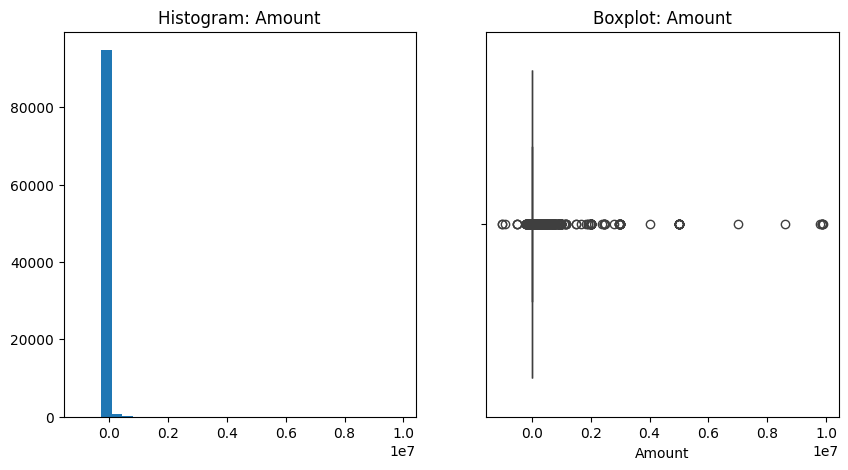

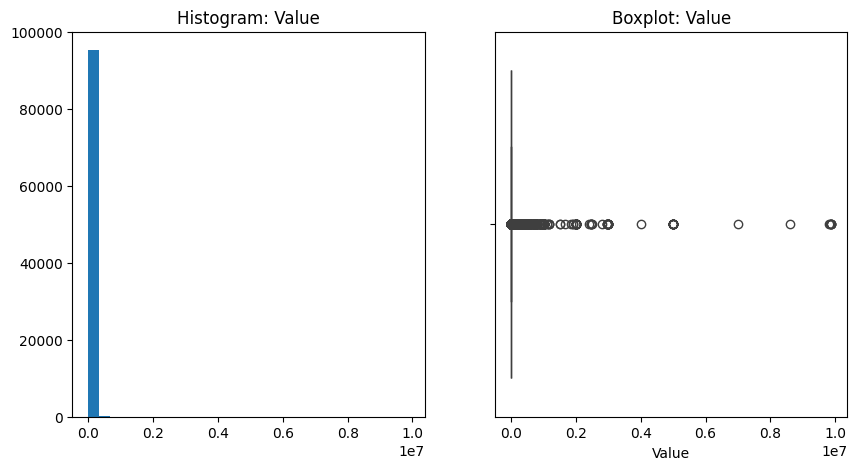

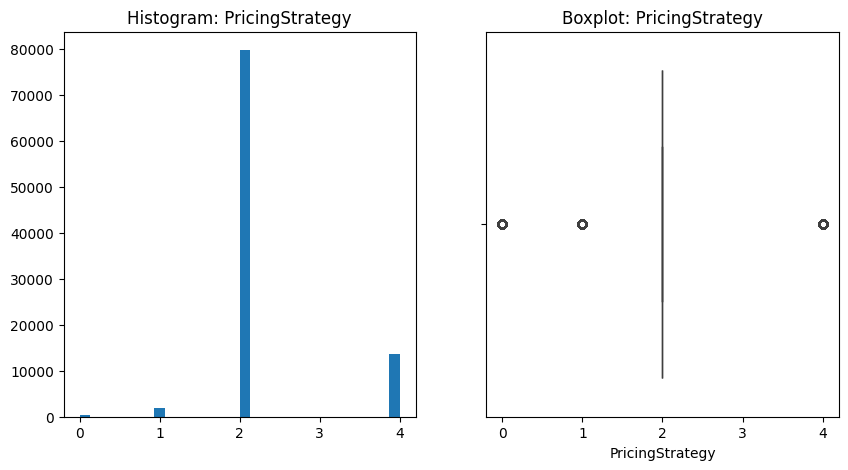

In [10]:
numeric_cols=[ 'Amount', 'Value', 'PricingStrategy']

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram: {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

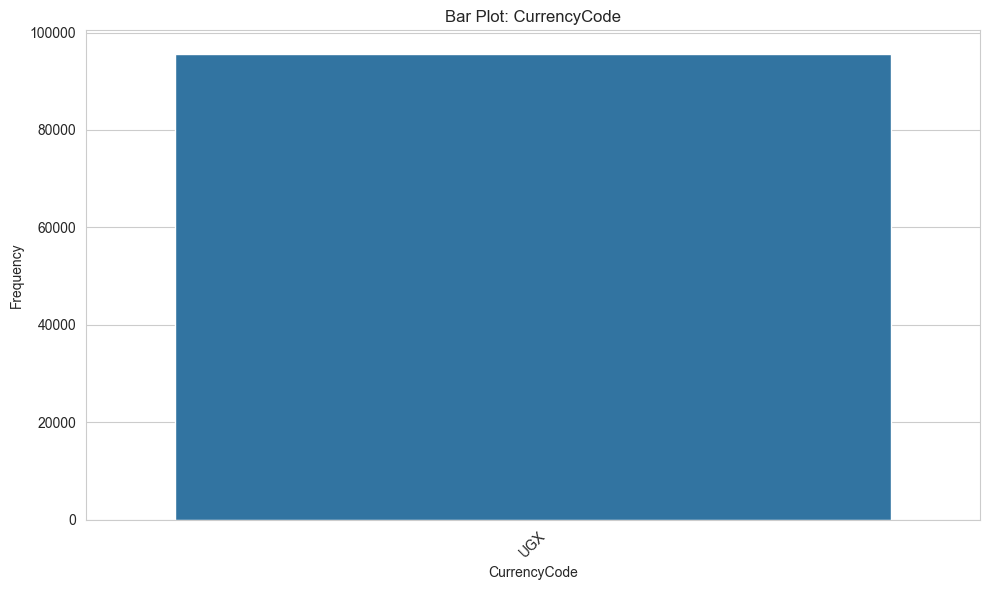

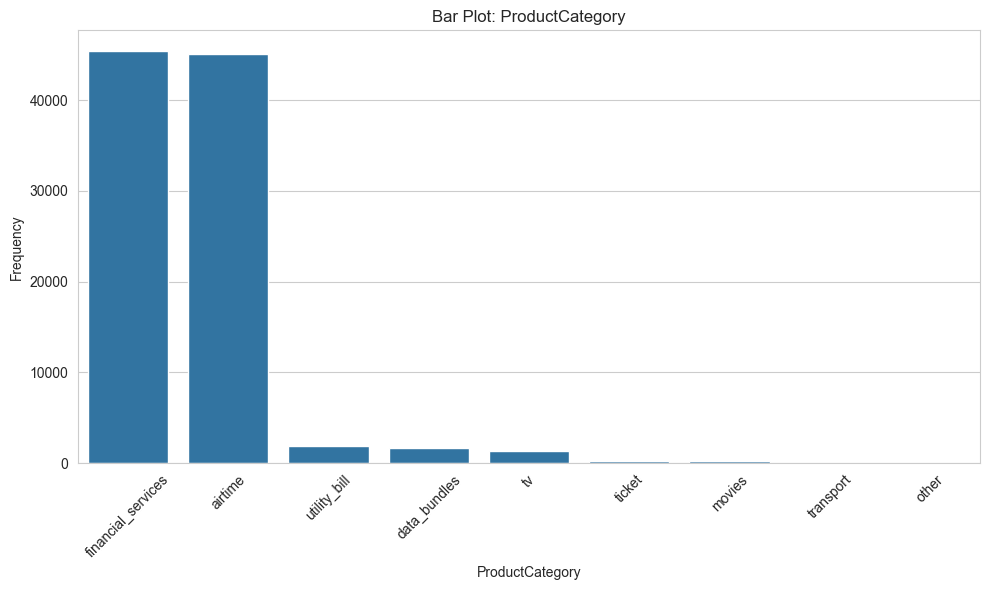

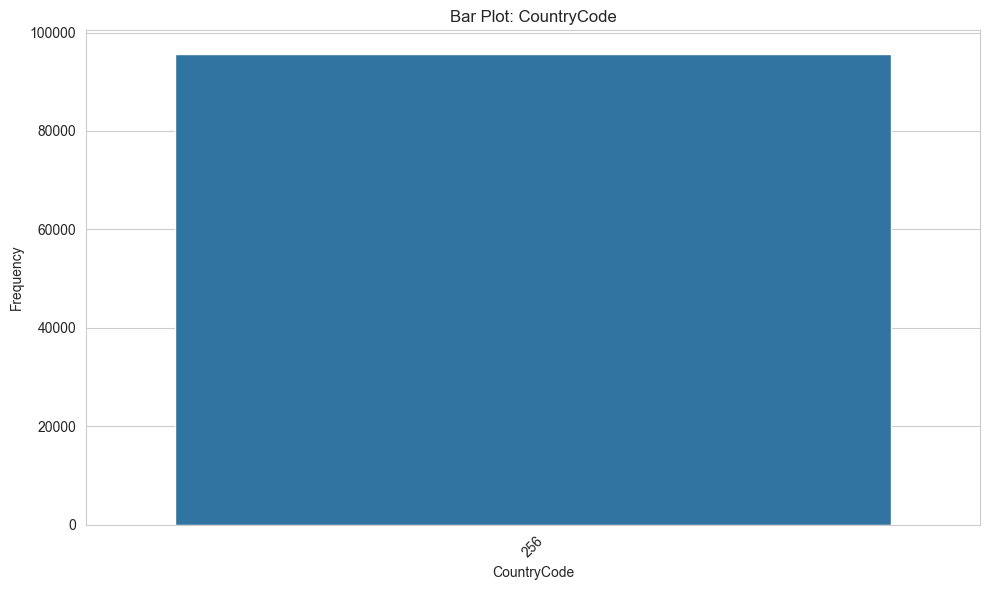

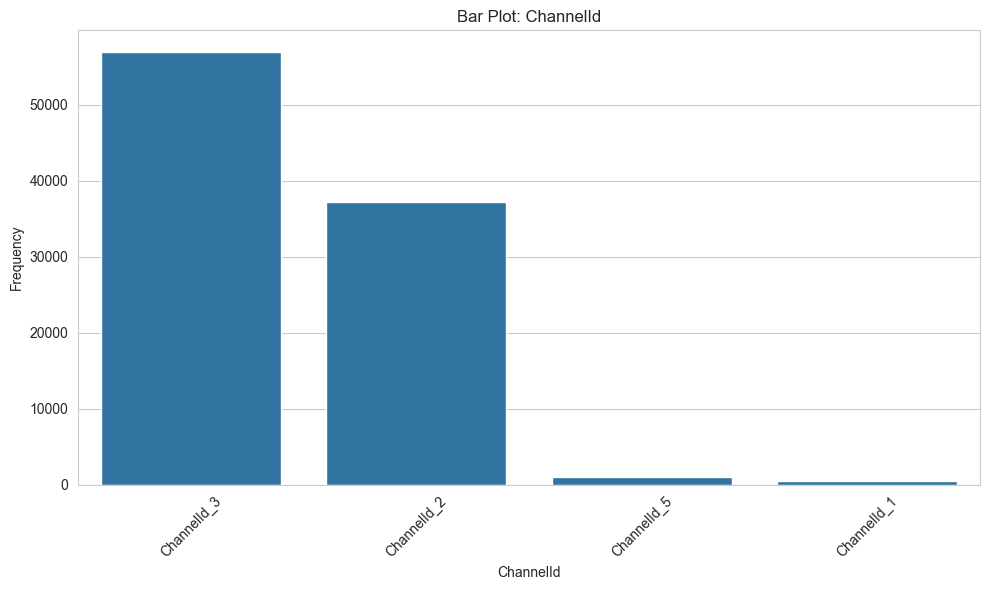

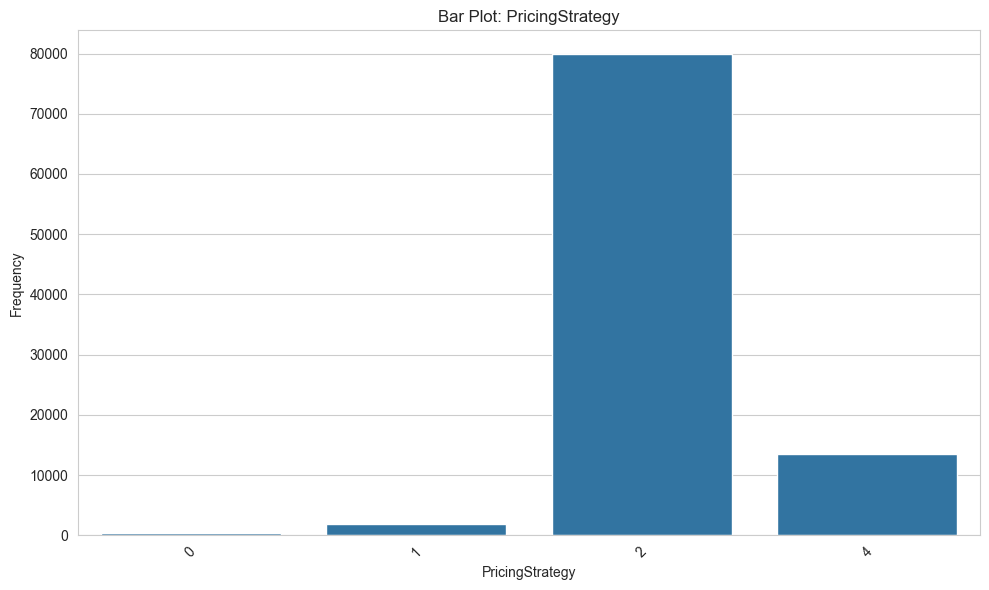

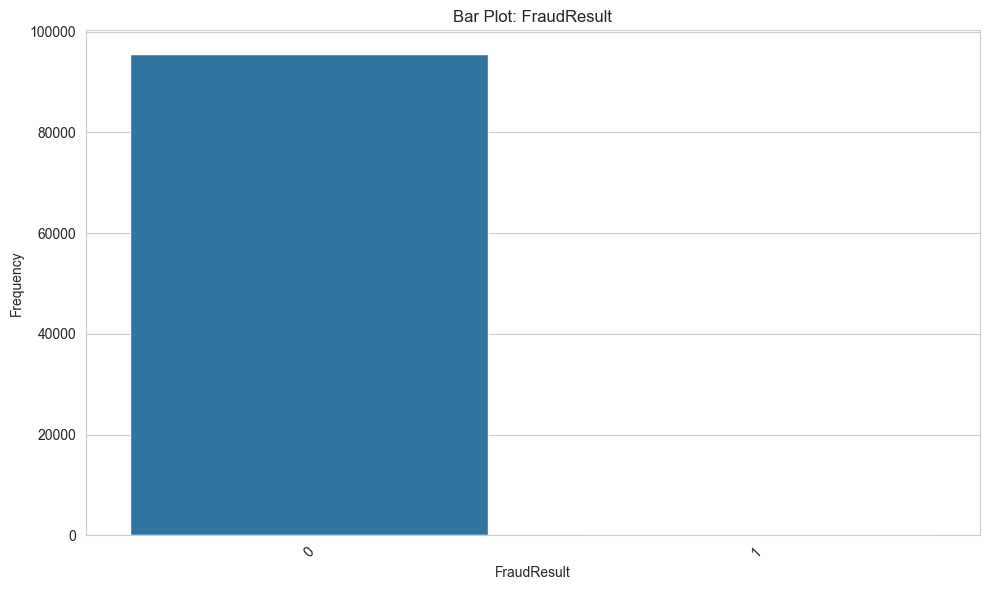

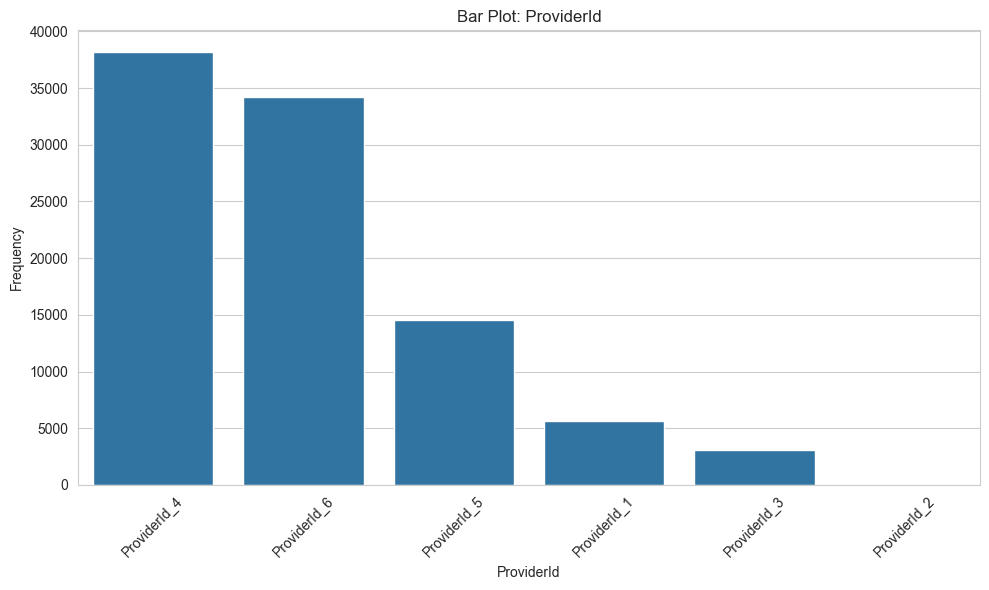

In [11]:
category_cols=['CurrencyCode',  'ProductCategory','CountryCode',
              'ChannelId', 'PricingStrategy', 'FraudResult','ProviderId']
sns.set_style(style="whitegrid")
for col in category_cols:
    plt.figure(figsize=(10, 6))
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Bar Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
for col in category_cols:
    print(col, "→ unique values:", df[col].nunique())


CurrencyCode → unique values: 1
ProductCategory → unique values: 9
CountryCode → unique values: 1
ChannelId → unique values: 4
PricingStrategy → unique values: 4
FraudResult → unique values: 2
ProviderId → unique values: 6


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

as shown in hte correlation matrix. there is strong positive correlation between value and amount

In [13]:
def detect_outliers(data,cols):
    Q1=data[cols].quantile(0.25)
    Q3=data[cols].quantile(0.75)
    IQR=Q3-Q1

    lower=Q1 - 1.5 * IQR
    upper=Q1 + 1.5 * IQR
    outliers = data[(data[cols] < lower) | (data[cols] > upper)]
    return outliers, lower, upper

for col in numeric_cols:
    outliers, low, high = detect_outliers(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {low}, Upper Bound: {high}")
    print(f"Outliers detected: {len(outliers)}")


Column: Amount
Lower Bound: -4325.0, Upper Bound: 4225.0
Outliers detected: 30507

Column: Value
Lower Bound: -6812.5, Upper Bound: 7362.5
Outliers detected: 19317

Column: PricingStrategy
Lower Bound: 2.0, Upper Bound: 2.0
Outliers detected: 15814
